In [1]:
%matplotlib inline
import sys
from lib.restartable_pendulum import RestartablePendulumEnv
from lib import state_rep_torch as srt
import gym
import numpy as np
from matplotlib import pyplot as plt
import torch
from lib import utils
from lib import encoder_wrappers as ew

# specify environment information
n_repeats = 3 # step the environment this many times for each action, concatenate the pixel observations
env = RestartablePendulumEnv(repeats=n_repeats,pixels=True)

save_dir = "./"

# Mixture of LDS with regularization (n_repeats=2)

/home/holdenlee/.local/lib/python3.8/site-packages/torch/autograd/__init__.py:130: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  Variable._execution_engine.run_backward(


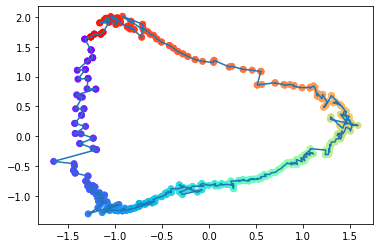

In [2]:
# specify environment information
n_repeats = 2 # step the environment this many times for each action, concatenate the pixel observations
env = RestartablePendulumEnv(repeats=n_repeats,pixels=True)


#nonlin = torch.nn.ELU()
nonlin = torch.nn.functional.relu
layers = [50, 10, 3] # architecture of encoder after the 2 conv layers
save_dir = "./"
n_episodes = 1000 # total batches to draw
batch_size = 64
learning_rate = .001
save_every = int(n_episodes/4) # save the model every so often

encnet = srt.ConvEncoderNet(layers,env.observation_space.shape[1:],sigma=nonlin)
mixnet = srt.SoftmaxNet([3,6])

# use the following commented out lines for PredictorNet (I changed deterministic sampling though...
#prednet = srt.PredictorNet(encnet,T,layers[-1],1)
#deterministic_args = (samples[i], batch_size, 35, method, n_repeats,T) 

#0.1,0,10
#prednet = srt.ForwardNet(encnet,layers[-1],1)
#mixture of 5
prednet = srt.MixtureForwardNet(encnet,layers[-1],1,6,mixnet,alpha=1,mean_coeff = 1, covar_coeff=1)
deterministic_args = None 

traj_sampler = srt.SimpleTrajectorySampler(env,
                                     srt.sample_pendulum_action_batch_zero,
                                     srt.sample_pendulum_state_batch_old,
                                     device=torch.device("cpu"),
                                     deterministic=False,
                                     deterministic_args=deterministic_args)

net, losses = srt.train_encoder(prednet,traj_sampler,n_episodes,
                                batch_size=batch_size,
                                track_loss_every=int(n_episodes/100),
                                lr=learning_rate,
                                save_every=save_every,
                                save_path=save_dir+"/normed")

torch.save(net,save_dir+"/normed.net")



# what follows is code to visualize the representations
d = 3 # must match the final entry in layers
n_samps = 500
env = ew.TorchEncoderWrapper(env,net.encoder,np.eye(d))
X = np.empty((n_samps,d))
for i,ang in enumerate(np.linspace(0,2*np.pi,n_samps)): # go through the angles from 0 to 2pi
    X[i,:] = env.reset(state=[ang,0])
    #env.render()
xhat = utils.visualize_trajectory_aligned(X)

# Mixture of LDS with regularization (n_repeats=3)

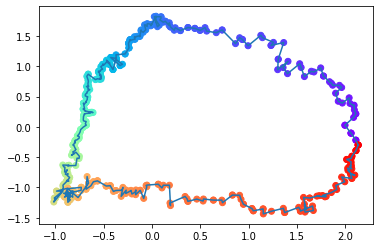

In [5]:
# specify environment information
n_repeats = 3 # step the environment this many times for each action, concatenate the pixel observations
env = RestartablePendulumEnv(repeats=n_repeats,pixels=True)


#nonlin = torch.nn.ELU()
nonlin = torch.nn.functional.relu
layers = [50, 10, 3] # architecture of encoder after the 2 conv layers
save_dir = "./"
n_episodes = 1000 # total batches to draw
batch_size = 64
learning_rate = .001
save_every = int(n_episodes/4) # save the model every so often

encnet = srt.ConvEncoderNet(layers,env.observation_space.shape[1:],sigma=nonlin)
mixnet = srt.SoftmaxNet([3,6])

# use the following commented out lines for PredictorNet (I changed deterministic sampling though...
#prednet = srt.PredictorNet(encnet,T,layers[-1],1)
#deterministic_args = (samples[i], batch_size, 35, method, n_repeats,T) 

#0.1,0,10
#prednet = srt.ForwardNet(encnet,layers[-1],1)
#mixture of 5
prednet = srt.MixtureForwardNet(encnet,layers[-1],1,6,mixnet,alpha=1,mean_coeff = 1, covar_coeff=1)
deterministic_args = None 

traj_sampler = srt.SimpleTrajectorySampler(env,
                                     srt.sample_pendulum_action_batch_zero,
                                     srt.sample_pendulum_state_batch_old,
                                     device=torch.device("cpu"),
                                     deterministic=False,
                                     deterministic_args=deterministic_args)

net, losses = srt.train_encoder(prednet,traj_sampler,n_episodes,
                                batch_size=batch_size,
                                track_loss_every=int(n_episodes/100),
                                lr=learning_rate,
                                save_every=save_every,
                                save_path=save_dir+"/normed3")

torch.save(net,save_dir+"/normed3.net")



# what follows is code to visualize the representations
d = 3 # must match the final entry in layers
n_samps = 500
env = ew.TorchEncoderWrapper(env,net.encoder,np.eye(d))
X = np.empty((n_samps,d))
for i,ang in enumerate(np.linspace(0,2*np.pi,n_samps)): # go through the angles from 0 to 2pi
    X[i,:] = env.reset(state=[ang,0])
    #env.render()
xhat = utils.visualize_trajectory_aligned(X)

# Control: no forward loss, regularization only

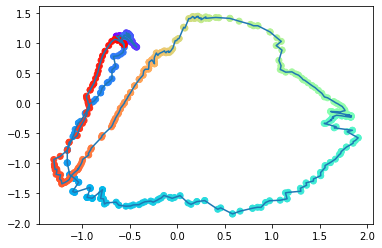

In [3]:
# specify environment information
n_repeats = 3 # step the environment this many times for each action, concatenate the pixel observations
env = RestartablePendulumEnv(repeats=n_repeats,pixels=True)


#nonlin = torch.nn.ELU()
nonlin = torch.nn.functional.relu
layers = [50, 10, 3] # architecture of encoder after the 2 conv layers
save_dir = "./"
n_episodes = 1000 # total batches to draw
batch_size = 64
learning_rate = .001
save_every = int(n_episodes/4) # save the model every so often

encnet = srt.ConvEncoderNet(layers,env.observation_space.shape[1:],sigma=nonlin)
mixnet = srt.SoftmaxNet([3,6])

# use the following commented out lines for PredictorNet (I changed deterministic sampling though...
#prednet = srt.PredictorNet(encnet,T,layers[-1],1)
#deterministic_args = (samples[i], batch_size, 35, method, n_repeats,T) 

#0.1,0,10
#prednet = srt.ForwardNet(encnet,layers[-1],1)
#mixture of 5
prednet = srt.MixtureForwardNet(encnet,layers[-1],1,6,mixnet,alpha=0,mean_coeff = 1, covar_coeff=1)
deterministic_args = None 

traj_sampler = srt.SimpleTrajectorySampler(env,
                                     srt.sample_pendulum_action_batch_zero,
                                     srt.sample_pendulum_state_batch_old,
                                     device=torch.device("cpu"),
                                     deterministic=False,
                                     deterministic_args=deterministic_args)

net, losses = srt.train_encoder(prednet,traj_sampler,n_episodes,
                                batch_size=batch_size,
                                track_loss_every=int(n_episodes/100),
                                lr=learning_rate,
                                save_every=save_every,
                                save_path=save_dir+"/normed_only")

torch.save(net,save_dir+"/normed_only.net")



# what follows is code to visualize the representations
d = 3 # must match the final entry in layers
n_samps = 500
env = ew.TorchEncoderWrapper(env,net.encoder,np.eye(d))
X = np.empty((n_samps,d))
for i,ang in enumerate(np.linspace(0,2*np.pi,n_samps)): # go through the angles from 0 to 2pi
    X[i,:] = env.reset(state=[ang,0])
    #env.render()
xhat = utils.visualize_trajectory_aligned(X)

# LDS (n_repeats=3)

/home/holdenlee/.local/lib/python3.8/site-packages/torch/autograd/__init__.py:130: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  Variable._execution_engine.run_backward(


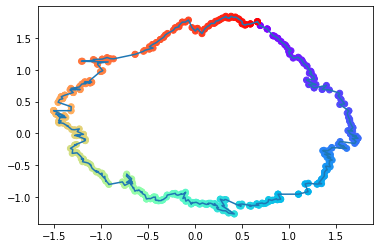

In [2]:
# specify environment information
n_repeats = 3 # step the environment this many times for each action, concatenate the pixel observations
env = RestartablePendulumEnv(repeats=n_repeats,pixels=True)
enc_dim = 3

#nonlin = torch.nn.ELU()
nonlin = torch.nn.functional.relu
layers = [50, 10, enc_dim] # architecture of encoder after the 2 conv layers
save_dir = "./"
n_episodes = 1000 # total batches to draw
batch_size = 64
learning_rate = .001
save_every = int(n_episodes/4) # save the model every so often

encnet = srt.ConvEncoderNet(layers,env.observation_space.shape[1:],sigma=nonlin)
#mixnet = srt.SoftmaxNet([3,6])

# use the following commented out lines for PredictorNet (I changed deterministic sampling though...
#prednet = srt.PredictorNet(encnet,T,layers[-1],1)
#deterministic_args = (samples[i], batch_size, 35, method, n_repeats,T) 

#0.1,0,10
#prednet = srt.ForwardNet(encnet,layers[-1],1)
#mixture of 5
prednet = srt.ForwardNet(encnet,layers[-1],1,mean_coeff = 1.0/enc_dim, covar_coeff=1.0/enc_dim)
deterministic_args = None 

traj_sampler = srt.SimpleTrajectorySampler(env,
                                     srt.sample_pendulum_action_batch_zero,
                                     srt.sample_pendulum_state_batch_old,
                                     device=torch.device("cpu"),
                                     deterministic=False,
                                     deterministic_args=deterministic_args)

net, losses = srt.train_encoder(prednet,traj_sampler,n_episodes,
                                batch_size=batch_size,
                                track_loss_every=int(n_episodes/100),
                                lr=learning_rate,
                                save_every=save_every,
                                save_path=save_dir+"/normed_linear")

torch.save(net,save_dir+"/normed_linear.net")



# what follows is code to visualize the representations
d = 3 # must match the final entry in layers
n_samps = 500
env = ew.TorchEncoderWrapper(env,net.encoder,np.eye(d))
X = np.empty((n_samps,d))
for i,ang in enumerate(np.linspace(0,2*np.pi,n_samps)): # go through the angles from 0 to 2pi
    X[i,:] = env.reset(state=[ang,0])
    #env.render()
xhat = utils.visualize_trajectory_aligned(X)